# Determinación del grosor de películas delgadas

Librerías a instalar

pip install pandas

pip install matplotlib

pip install scipy

pip install plotly

pip install plotly==5.14.1 (Si el de arriba no funciona)

pip install seaborn

pip install numpy

Basado en:

https://www.youtube.com/watch?v=r7juwIJlF5o

https://arxiv.org/ftp/arxiv/papers/2011/2011.04956.pdf

## Obtenemos los datos de los ficheros txt que nos da el programa de laboratorio

In [1]:
import pandas as pd

# Lee el archivo .txt
espectro1 = pd.read_csv("C:/Users/alvar/Documents/Tercero/Proyecto/Espectro 1/Transmitancia.txt", sep='\t')

# Muestra el DataFrame
espectro1.head()

espectro2 = pd.read_csv("C:/Users/alvar/Documents/Tercero/Proyecto/Espectro 2/valores transmitancia.txt", sep='\t')

# Muestra el DataFrame
espectro2.head()

espectro3 = pd.read_csv("C:/Users/alvar/Documents/Tercero/Proyecto/Espectro 3/Valores_transmitancia.txt", sep='\t')

# Muestra el DataFrame
espectro3.head()



,Wavelength [nm],%T
0,200.8,1.017910
1,201.4,0.785260
2,202.2,1.545770
3,202.8,1.955020
4,203.6,0.545551


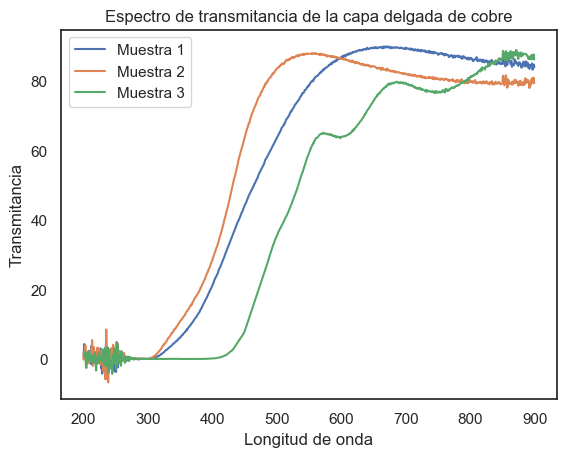

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extraer los datos de longitud de onda y reflectancia
longitud_onda1 = espectro1['Wavelength [nm]']
transmitancia1 = espectro1['%T']
longitud_onda2 = espectro2['Wavelength [nm]']
transmitancia2 = espectro2['%T']
longitud_onda3 = espectro3['Wavelength [nm]']
transmitancia3 = espectro3['%T']

# Configurar el estilo de Seaborn
sns.set(style='white')

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Graficar el espectro de transmitancia
sns.lineplot(x=longitud_onda1, y=transmitancia1, label='Muestra 1')
sns.lineplot(x=longitud_onda2, y=transmitancia2, label='Muestra 2')
sns.lineplot(x=longitud_onda3, y=transmitancia3, label='Muestra 3')

# Configurar las etiquetas de los ejes y el título
ax.set(xlabel='Longitud de onda', ylabel='Transmitancia',
       title='Espectro de transmitancia de la capa delgada de cobre')

# Agregar la leyenda
ax.legend()

# Mostrar la gráfica
plt.show()



## Mostramos la transmitancia de cada muestra

In [14]:
import pandas as pd
import plotly.graph_objects as go

# Extraer los datos de longitud de onda y transmitancia
longitud_onda1 = espectro1['Wavelength [nm]']
transmitancia1 = espectro1['%T']
longitud_onda2 = espectro2['Wavelength [nm]']
transmitancia2 = espectro2['%T']
longitud_onda3 = espectro3['Wavelength [nm]']
transmitancia3 = espectro3['%T']


# Crear la figura
fig = go.Figure()

# Agregar el espectro de transmitancia
#fig.add_trace(go.Scatter(x=longitud_onda2, y=transmitancia2, mode='lines', line=dict(color='blue'), name='Muestra 1'))
#fig.add_trace(go.Scatter(x=longitud_onda1, y=transmitancia1, mode='lines', line=dict(color='red'), name='Muestra 2'))
fig.add_trace(go.Scatter(x=longitud_onda3, y=transmitancia3, mode='lines', line=dict(color='green'), name='Muestra 3'))

# Resaltar los picos en el gráfico


# Configurar el diseño del gráfico
fig.update_layout(
    xaxis=dict(title='Longitud de onda [nm]'),
    yaxis=dict(title='Transmitancia [%]'),
    title='Espectro de transmitancia de la capa delgada de cobre',
    showlegend=True, plot_bgcolor="white",paper_bgcolor="white"
)

# Mostrar el gráfico
fig.show()

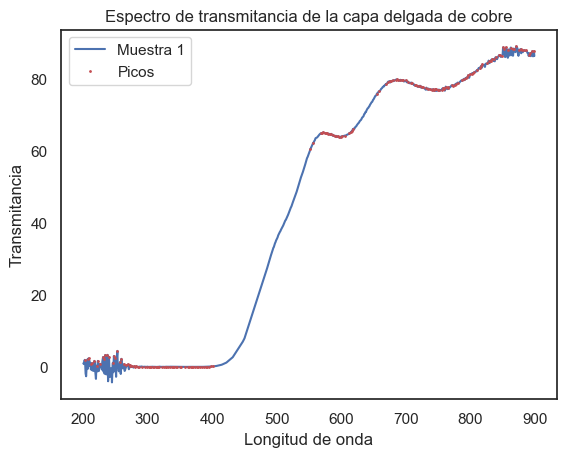

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks

# Extraer los datos de longitud de onda y transmitancia
longitud_onda3 = espectro3['Wavelength [nm]']
transmitancia3 = espectro3['%T']


# Encontrar los picos en la transmitancia
peaks, _ = find_peaks(transmitancia3, height=0.000001)

# Configurar el estilo de Seaborn
sns.set(style='white')

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Graficar el espectro de transmitancia
sns.lineplot(x=longitud_onda3, y=transmitancia3, label='Muestra 1')

# Resaltar los picos en la gráfica
ax.plot(longitud_onda3[peaks], transmitancia3[peaks], 'ro', markersize=1, label='Picos')

# Configurar las etiquetas de los ejes y el título
ax.set(xlabel='Longitud de onda', ylabel='Transmitancia',
       title='Espectro de transmitancia de la capa delgada de cobre')

# Agregar la leyenda
ax.legend()

# Mostrar la gráfica
plt.show()


## Buscamos los picos que sobresalen de la transmitancia

## Abrimos el archivo de excel de la transmitancia de la muestra 3 con las curvas Lower y Upper Envelope

Para ello modificar el txt y pasar los puntos a comas, abrirlo con excel y pasarlo a OriginLab, graficar la transmitancia y en la zona de análisis ir a signal processing y luego pulsar Envelope. Una vez hecho eso seleccionamos las columnas y copiamos manteniendo el índice y volvemos a poner las comas

In [111]:
import pandas as pd

# Cargar el DataFrame
df3 = pd.read_excel("C:/Users/alvar/Documents/Tercero/Proyecto/Espectro 3/Transmitancia envelope.xlsx")
df1 = pd.read_excel("C:/Users/alvar/Documents/Tercero/Proyecto/Espectro 1/Transmitancia envelope.xlsx")
df2 = pd.read_excel("C:/Users/alvar/Documents/Tercero/Proyecto/Espectro 2/Transmitancia envelope.xlsx")

df2.head()


,Longitud de onda,Transmitancia,U Envelope Y 1,L Envelope Y 2
0,899.0,79.3451,42.48662,77.75909
1,898.4,80.9208,47.81075,77.27159
2,896.4,79.4172,62.15848,76.50546
3,895.6,80.7884,66.56356,76.50280
4,894.2,80.1719,72.65957,76.80337


## Mostramos el espectro con las curvas de Lower y Upper Envelope

In [112]:
import pandas as pd
import plotly.graph_objects as go





# Crear la figura
fig = go.Figure()

# Agregar el espectro de transmitancia
fig.add_trace(go.Scatter(x=df3['Longitud de onda'], y=df3['Transmitancia'], mode='lines', name='Muestra 3'))

# Resaltar los picos en el gráfico
fig.add_trace(go.Scatter(x=df3['Longitud de onda'], y=df3['L Envelope Y 2'], mode='lines', name='Lower envelop transformation of Transmitancia',
                         marker=dict(color='red', size=1)))
fig.add_trace(go.Scatter(x=df3['Longitud de onda'], y=df3['U Envelope Y 1'], mode='lines', name='Upper envelop transformation of Transmitancia',
                         marker=dict(color='green', size=1)))

# Configurar el diseño del gráfico
fig.update_layout(
    xaxis=dict(title='Longitud de onda'),
    yaxis=dict(title='Transmitancia'),
    title='Espectro de transmitancia de la capa delgada de cobre',
    showlegend=True, plot_bgcolor="white",paper_bgcolor="white"
)

# Mostrar el gráfico
fig.show()


In [113]:
# Crear la figura
fig = go.Figure()

# Agregar el espectro de transmitancia
fig.add_trace(go.Scatter(x=df2['Longitud de onda'], y=df2['Transmitancia'], mode='lines', name='Muestra 2'))

# Resaltar los picos en el gráfico
fig.add_trace(go.Scatter(x=df2['Longitud de onda'], y=df2['L Envelope Y 2'], mode='lines', name='Lower envelop transformation of Transmitancia',
                         marker=dict(color='red', size=1)))
fig.add_trace(go.Scatter(x=df2['Longitud de onda'], y=df2['U Envelope Y 1'], mode='lines', name='Upper envelop transformation of Transmitancia',
                         marker=dict(color='green', size=1)))

# Configurar el diseño del gráfico
fig.update_layout(
    xaxis=dict(title='Longitud de onda'),
    yaxis=dict(title='Transmitancia'),
    title='Espectro de transmitancia de la capa delgada de cobre',
    showlegend=True, plot_bgcolor="white",paper_bgcolor="white"
)

# Mostrar el gráfico
fig.show()

## Introducimos los valores de las ecuaciones con las que obtendremos el índice de refracción y el grosor

In [114]:
import numpy as np

df3['S_const'] = 1.51

# df3['S'] = 1/df3['Transmitancia']+ np.sqrt(1/((df3['Transmitancia']*df3['Transmitancia'])-1))

df3['N'] = 2*df3['S_const']*((df3['U Envelope Y 1']-df3['L Envelope Y 2'])/(df3['U Envelope Y 1']*df3['L Envelope Y 2'])) + (df3['S_const']*df3['S_const']+1)/2

df3['Índice de refrac'] = np.sqrt(df3['N']+ np.sqrt(df3['N']*df3['N'] - df3['S_const']*df3['S_const']))
print(df3['Índice de refrac'].mean())
print(df3['Índice de refrac'].std())
df3.head()

4.566344506087375
9.311119359608837


c:\Users\alvar\Documents\Tercero\Mineria de datos\MD-env\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning:

invalid value encountered in sqrt



,Longitud de onda,Transmitancia,U Envelope Y 1,L Envelope Y 2,S_const,N,Índice de refrac
0,200.8,1.01791,1.54703,-4.96672,1.51,-0.920125,NaN
1,201.4,0.78526,1.65786,-4.94038,1.51,-0.792864,NaN
2,202.2,1.54577,1.82378,-4.68426,1.51,-0.660564,NaN
3,202.8,1.95502,1.95502,-4.35770,1.51,-0.597717,NaN
4,203.6,0.54555,2.12911,-3.78886,1.51,-0.575457,NaN


In [115]:
df2['S_const'] = 1.51

# df2['S'] = 1/df2['Transmitancia']+ np.sqrt(1/((df2['Transmitancia']*df2['Transmitancia'])-1))

df2['N'] = 2*df2['S_const']*((df2['U Envelope Y 1']-df2['L Envelope Y 2'])/(df2['U Envelope Y 1']*df2['L Envelope Y 2'])) + (df2['S_const']*df2['S_const']+1)/2

df2['Índice de refrac'] = np.sqrt(df2['N']+ np.sqrt(df2['N']*df2['N'] - df2['S_const']*df2['S_const']))
print(df2['Índice de refrac'].mean())
print(df2['Índice de refrac'].std())
df2.head()

2.1718463661867933
3.0893217384389295


c:\Users\alvar\Documents\Tercero\Mineria de datos\MD-env\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning:

invalid value encountered in sqrt



,Longitud de onda,Transmitancia,U Envelope Y 1,L Envelope Y 2,S_const,N,Índice de refrac
0,899.0,79.3451,42.48662,77.75909,1.51,1.607807,1.469702
1,898.4,80.9208,47.81075,77.27159,1.51,1.615967,1.480375
2,896.4,79.4172,62.15848,76.50546,1.51,1.630939,1.499089
3,895.6,80.7884,66.56356,76.50280,1.51,1.634156,1.502979
4,894.2,80.1719,72.65957,76.80337,1.51,1.637807,1.507345


In [116]:
df1['S_const'] = 1.51

# df2['S'] = 1/df2['Transmitancia']+ np.sqrt(1/((df2['Transmitancia']*df2['Transmitancia'])-1))

df1['N'] = 2*df1['S_const']*((df1['U Envelope Y 1']-df1['L Envelope Y 2'])/(df1['U Envelope Y 1']*df1['L Envelope Y 2'])) + (df1['S_const']*df1['S_const']+1)/2

df1['Índice de refrac'] = np.sqrt(df1['N']+ np.sqrt(df1['N']*df1['N'] - df1['S_const']*df1['S_const']))
print(df1['Índice de refrac'].mean())
print(df1['Índice de refrac'].std())
df1.head()

2.10247057147876
3.5994450606433226


c:\Users\alvar\Documents\Tercero\Mineria de datos\MD-env\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning:

invalid value encountered in sqrt



,Longitud de onda,Transmitancia,U Envelope Y 1,L Envelope Y 2,S_const,N,Índice de refrac
0,899.2,83.9108,85.52046,83.10850,1.51,1.641075,1.511207
1,898.4,84.7272,85.49824,83.14801,1.51,1.641048,1.511176
2,897.8,84.2551,85.43591,83.17177,1.51,1.641012,1.511133
3,896.4,83.2165,85.18783,83.21650,1.51,1.640890,1.510989
4,895.6,85.0127,85.01270,83.24087,1.51,1.640806,1.510891


In [117]:
# Crear la figura
try:
    fig = go.Figure()



    # Resaltar los picos en el gráfico
    fig.add_trace(go.Scatter(x=df3['Longitud de onda'], y=df3['Índice de refrac'], mode='lines', name='Índice de refracción',
                            marker=dict(color='red', size=1)))


    # Configurar el diseño del gráfico
    fig.update_layout(
        xaxis=dict(title='Longitud de onda'),
        yaxis=dict(title='Índice de refracción'),
        title='Índice de refracción de la capa delgada de cobre',
        showlegend=True, plot_bgcolor="white",paper_bgcolor="white"
    )

    # Mostrar el gráfico
    fig.show()
except Exception as e:
    print(e)

In [118]:
# Crear la figura
try:
    fig = go.Figure()



    # Resaltar los picos en el gráfico
    fig.add_trace(go.Scatter(x=df2['Longitud de onda'], y=df2['Índice de refrac'], mode='lines', name='Índice de refracción',
                            marker=dict(color='red', size=1)))


    # Configurar el diseño del gráfico
    fig.update_layout(
        xaxis=dict(title='Longitud de onda'),
        yaxis=dict(title='Índice de refracción'),
        title='Índice de refracción de la capa delgada de cobre de la muestra 2',
        showlegend=True, plot_bgcolor="white",paper_bgcolor="white"
    )

    # Mostrar el gráfico
    fig.show()
except Exception as e:
    print(e)

In [119]:
# Crear la figura
try:
    fig = go.Figure()



    # Resaltar los picos en el gráfico
    fig.add_trace(go.Scatter(x=df1['Longitud de onda'], y=df1['Índice de refrac'], mode='lines', name='Índice de refracción',
                            marker=dict(color='red', size=1)))


    # Configurar el diseño del gráfico
    fig.update_layout(
        xaxis=dict(title='Longitud de onda'),
        yaxis=dict(title='Índice de refracción'),
        title='Índice de refracción de la capa delgada de cobre de la muestra 1',
        showlegend=True, plot_bgcolor="white",paper_bgcolor="white"
    )

    # Mostrar el gráfico
    fig.show()
except Exception as e:
    print(e)

In [120]:
lambda1df3 = 571.8
lambda2df3 = 674.8

# Seleccionar los valores correspondientes en otras columnas
# columnas_seleccionadas = ['Índice de refrac']

indice1df3 = 1.510127 #df.loc[df['Longitud de onda'] == lambda1df3, columnas_seleccionadas]

indice2df3 = 1.510332 #df.loc[df['Longitud de onda'] == lambda2df3, columnas_seleccionadas]

d3 = (lambda1df3*lambda2df3) / (2*(lambda2df3*indice2df3 - lambda1df3*indice1df3))


print(d3)




1239.2315421850446


In [126]:
lambda1df2 = 850.8
lambda2df2 = 855

# Seleccionar los valores correspondientes en otras columnas
# columnas_seleccionadas = ['Índice de refrac']

indice1df2 = 1.510156 #df.loc[df['Longitud de onda'] == lambda1df3, columnas_seleccionadas]

indice2df2 = 1.51019 #df.loc[df['Longitud de onda'] == lambda2df3, columnas_seleccionadas]

d2 = (lambda1df2*lambda2df2) / (2*(lambda2df2*indice2df2 - lambda1df2*indice1df2))


print(d2)

57082.970244857024


In [122]:
lambda1df1 = 585
lambda2df1 = 608.2

# Seleccionar los valores correspondientes en otras columnas
# columnas_seleccionadas = ['Índice de refrac']

indice1df1 = 1.510227 #df.loc[df['Longitud de onda'] == lambda1df3, columnas_seleccionadas]
indice2df1 = 1.510204 #df.loc[df['Longitud de onda'] == lambda2df3, columnas_seleccionadas]

d1 = (lambda1df1*lambda2df1) / (2*(lambda2df1*indice2df1 - lambda1df1*indice1df1))


print(d1)

5079.436054383226
